In [1]:
import os
import random
import numpy as np
import tensorflow as tf
import cv2

In [2]:
from tensorflow.keras.preprocessing.image import load_img, array_to_img, img_to_array
from tensorflow.keras import backend as K

In [3]:
def jacard_coef(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)


def jacard_coef_loss(y_true, y_pred):
    return -jacard_coef(y_true, y_pred)  # -1 ultiplied as we want to minimize this value as loss function

In [4]:
def get_arr_frames(path_to_frames):
    
    #model = tf.keras.models.load_model(path_to_model,
    #                                  custom_objects={'jacard_coef':jacard_coef,
    #                                                   'jacard_coef_loss':jacard_coef_loss})
    
    list_name_frames = os.listdir(path_to_frames)
    
    msks_arr = np.zeros((len(list_name_frames), 256, 256, 1), dtype = np.bool)
    imgs_arr = np.zeros((len(list_name_frames), 256, 256, 3), dtype = np.float32)

    for index in range(0,len(list_name_frames)):
        img = load_img(os.path.join(path_to_frames,str(index)+'.jpg'), target_size = (256, 256, 3))
        print()
        imgs_arr[index] = img 
        imgs_arr[index] = imgs_arr[index] / 255
    return imgs_arr
        

In [ ]:
arr_img = get_arr_frames('../input/frames-from-video-me/frames/frames')

In [6]:
model = tf.keras.models.load_model('../input/model-coco-unet-segm-epoch-21/model_coco_epoch_21',
                                   custom_objects={'jacard_coef':jacard_coef,
                                                   'jacard_coef_loss':jacard_coef_loss})

2022-06-19 16:36:08.391604: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
def predict_mask(model,img_index,arr_img):
    pred = model.predict(arr_img[img_index].reshape((1, 256, 256,3)))
    return pred.reshape(256,256,1)

In [8]:
def get_all_maskes(model,arr_img):
    os.mkdir('./frame_masks')
    for index in range(0,len(arr_img)-1):
        pred_arr = predict_mask(model,index,arr_img)
        tf.keras.utils.save_img('./frame_masks/{}.jpeg'.format(str(index)),pred_arr)

In [9]:
get_all_maskes(model,arr_img)

2022-06-19 16:36:15.435539: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [10]:
def plotting(model,arr_img):
    for index in range(95,115):
        plt.figure(figsize=(25,10))
        plt.subplot(1,2,1)
        plt.title('Image')
        plt.imshow(array_to_img(arr_img[index]))
        plt.subplot(1,2,2)
        plt.title('Predicted Mask')
        plt.imshow(array_to_img(predict_mask(model,index,arr_img)))        

In [11]:
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec
%matplotlib inline

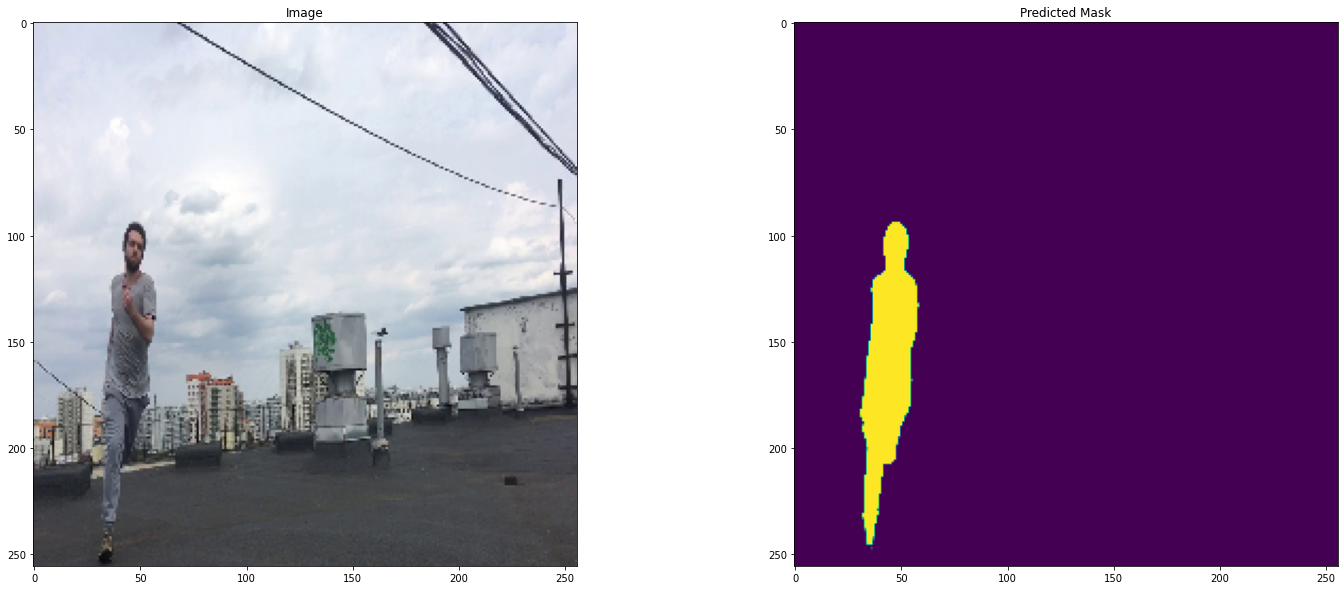

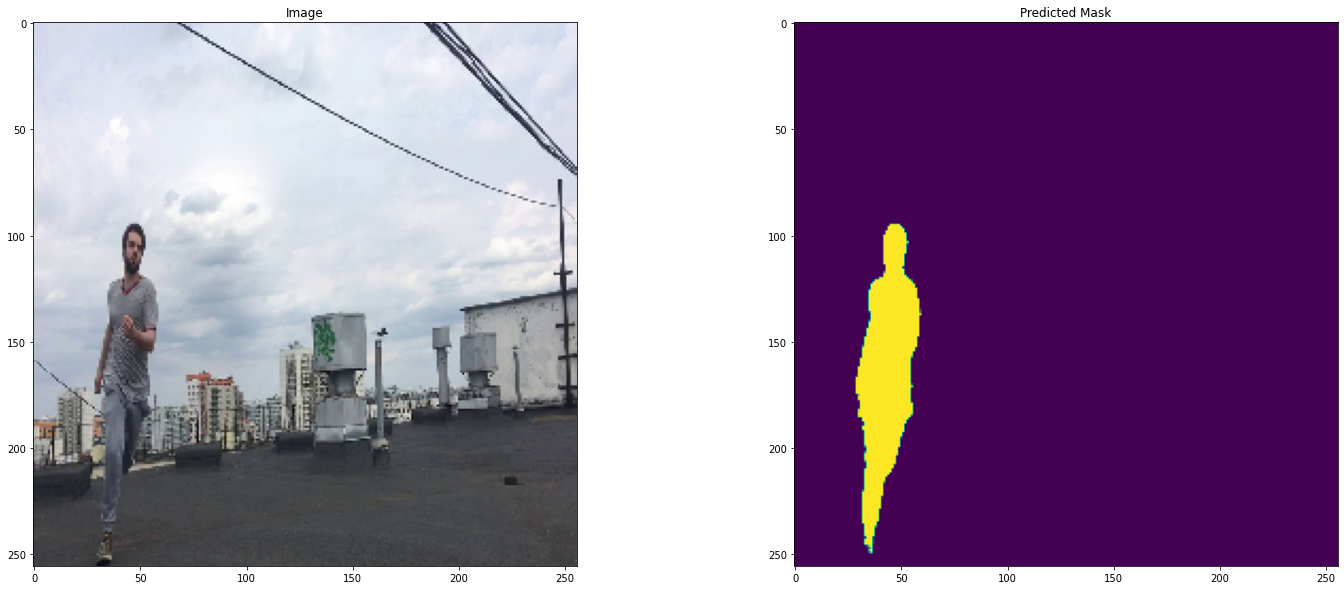

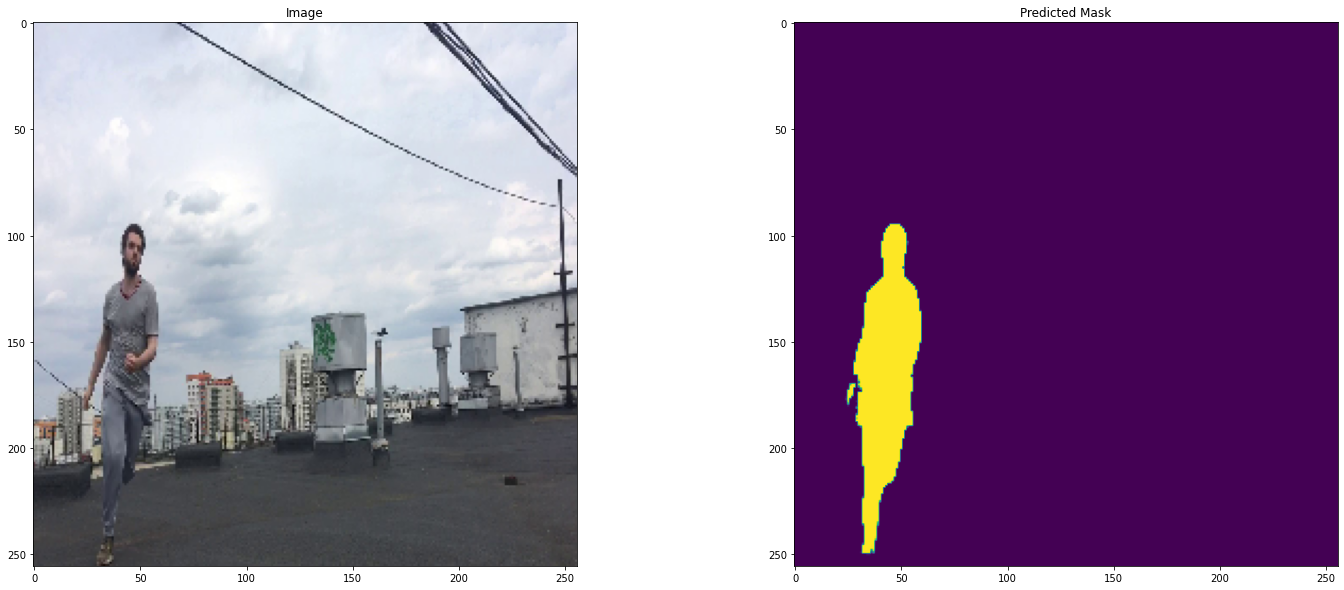

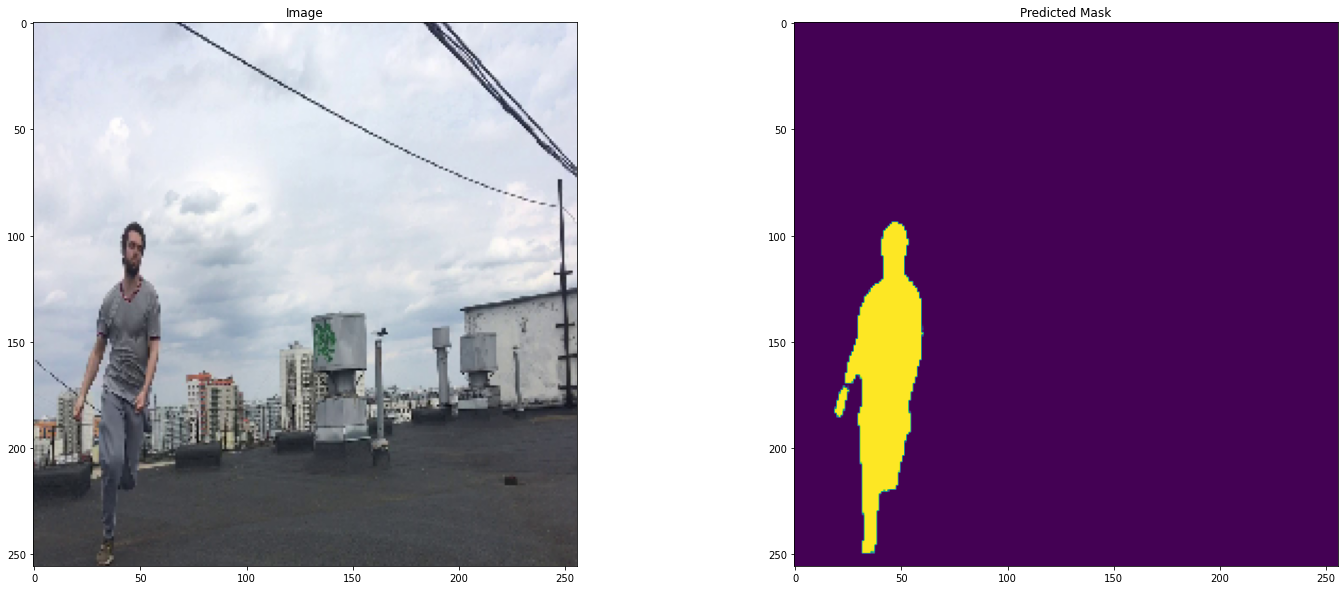

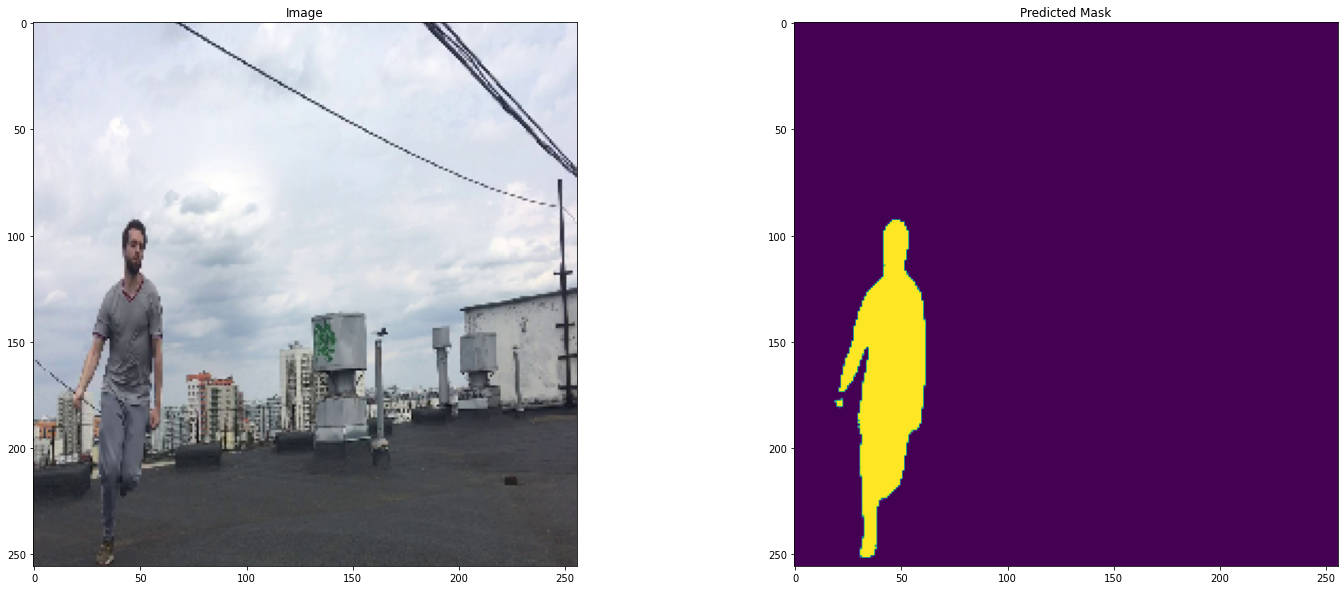

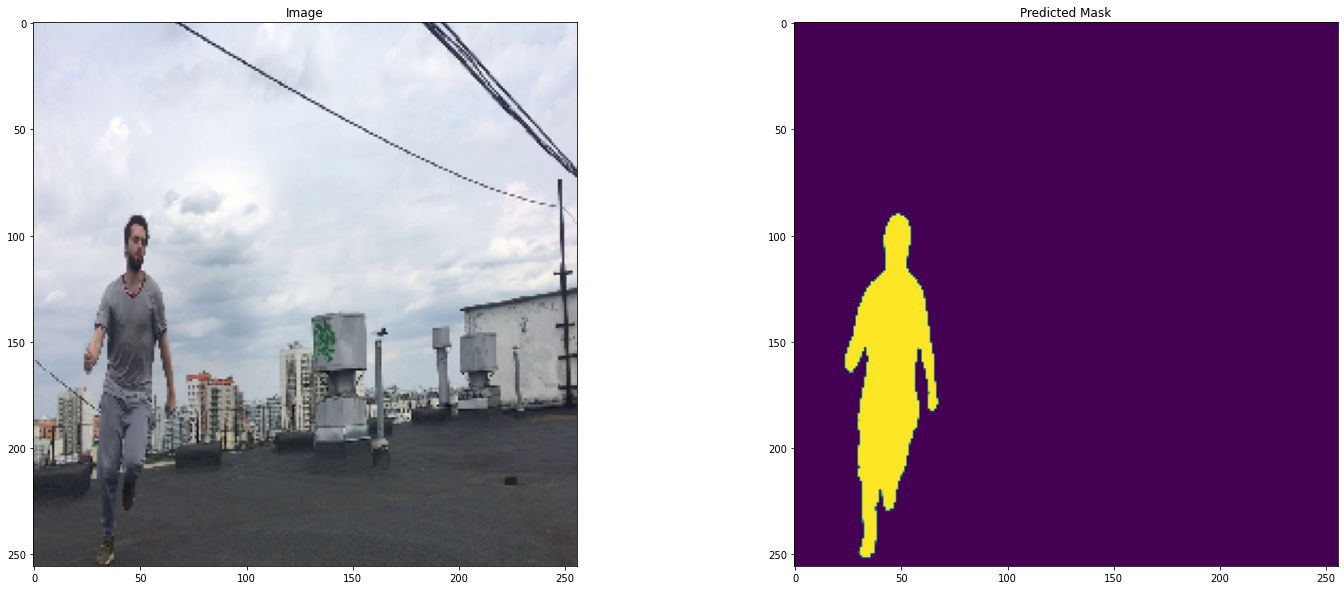

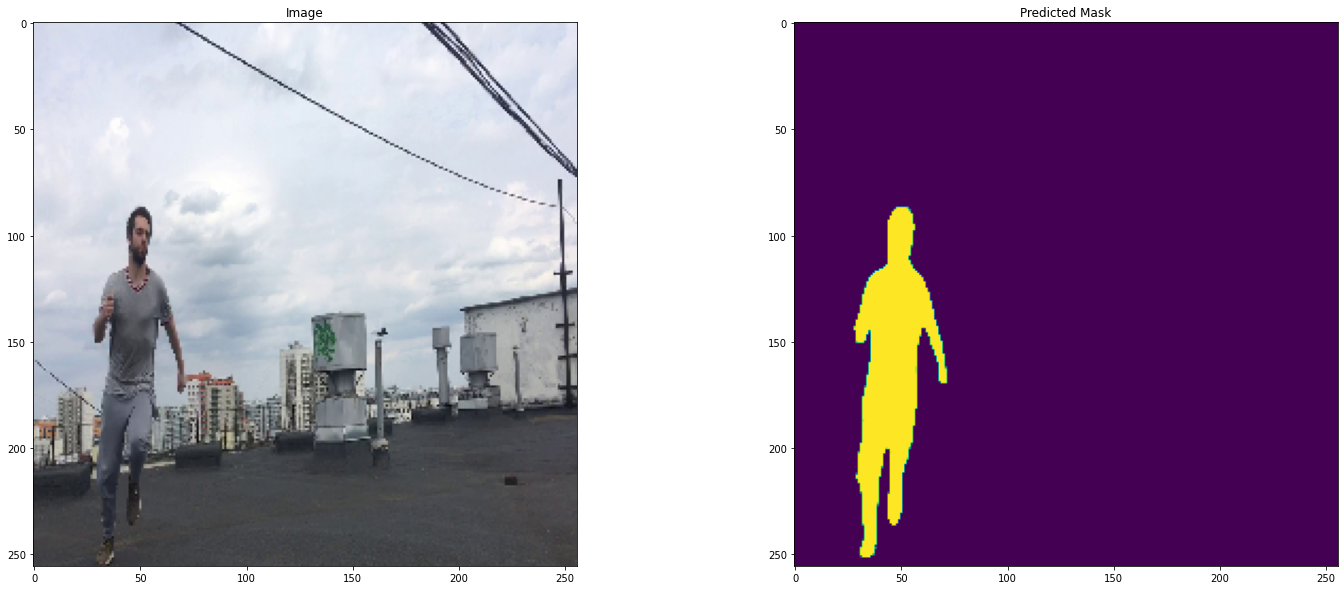

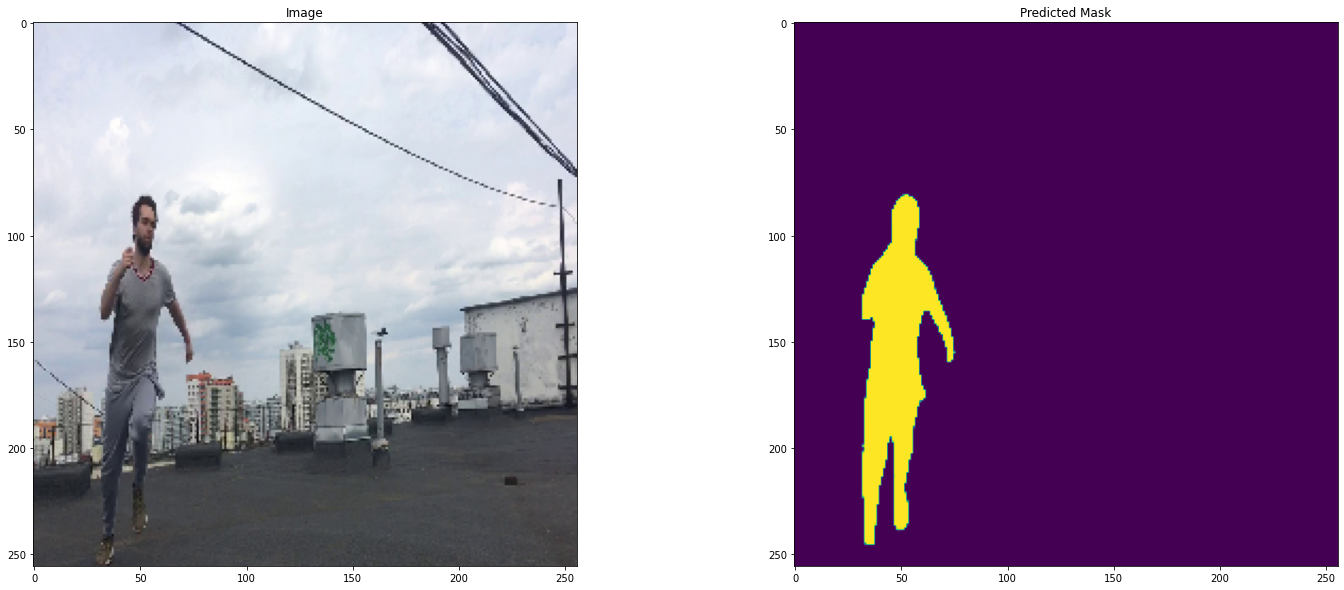

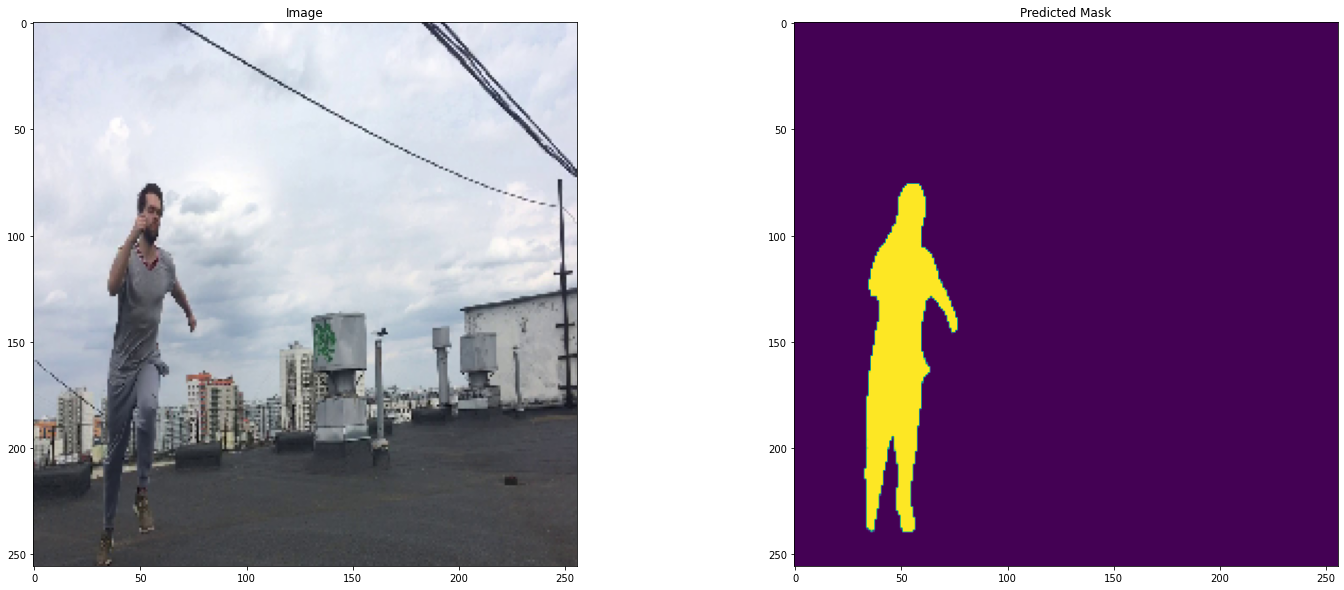

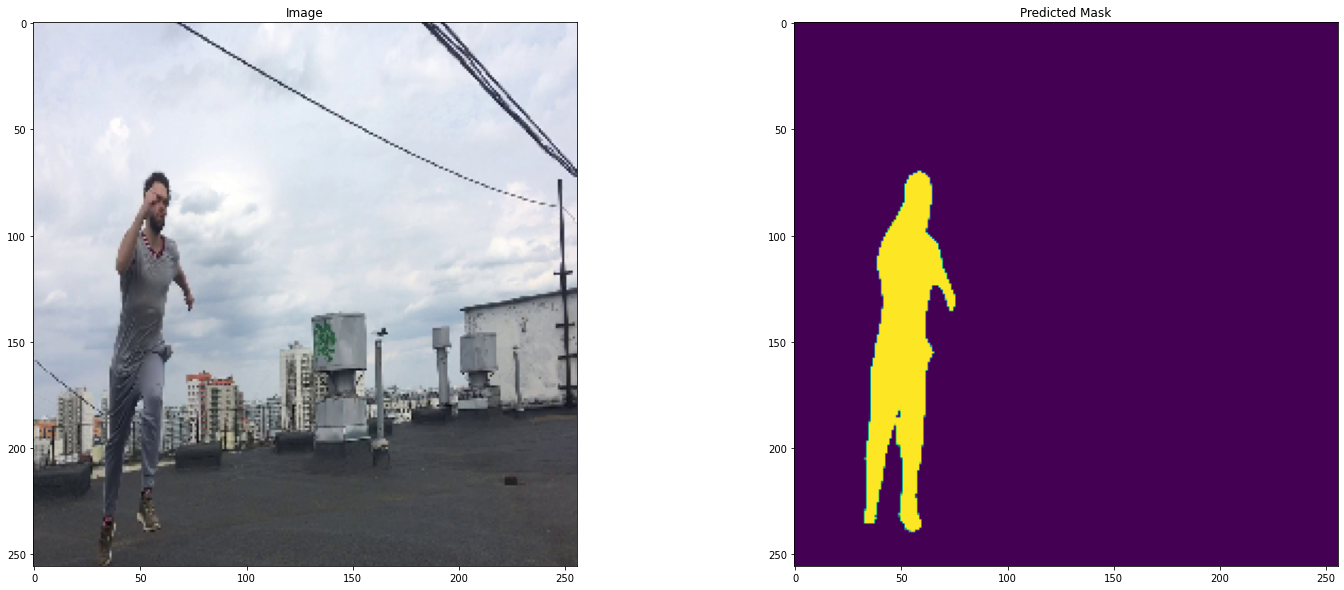

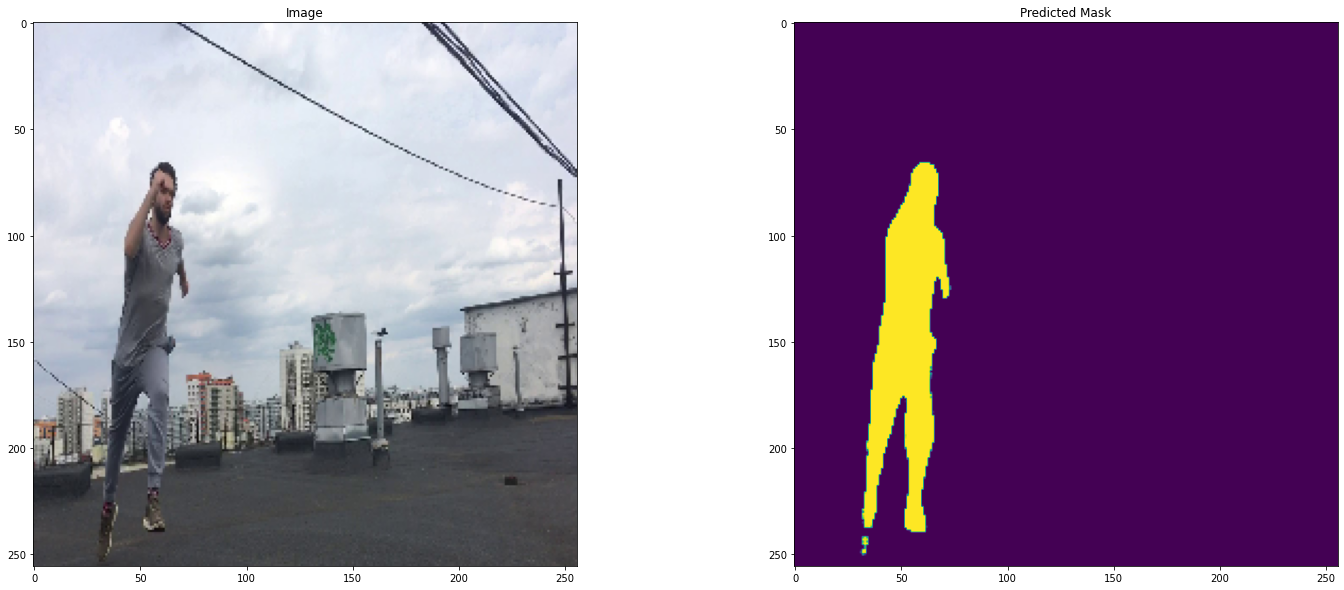

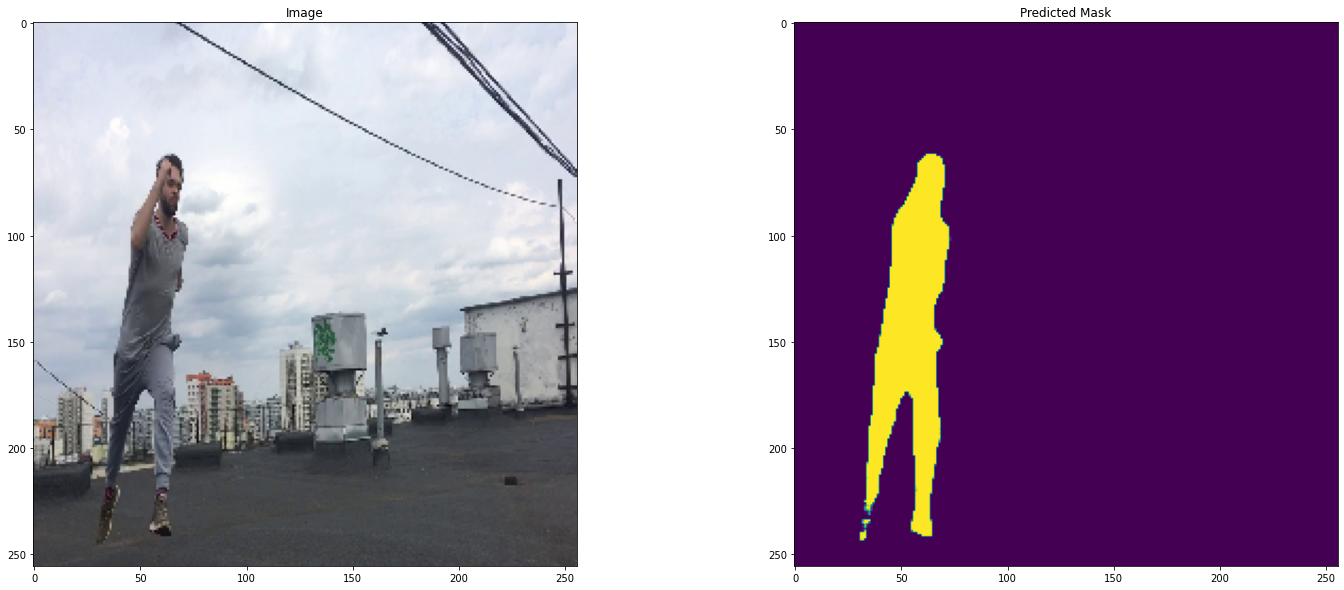

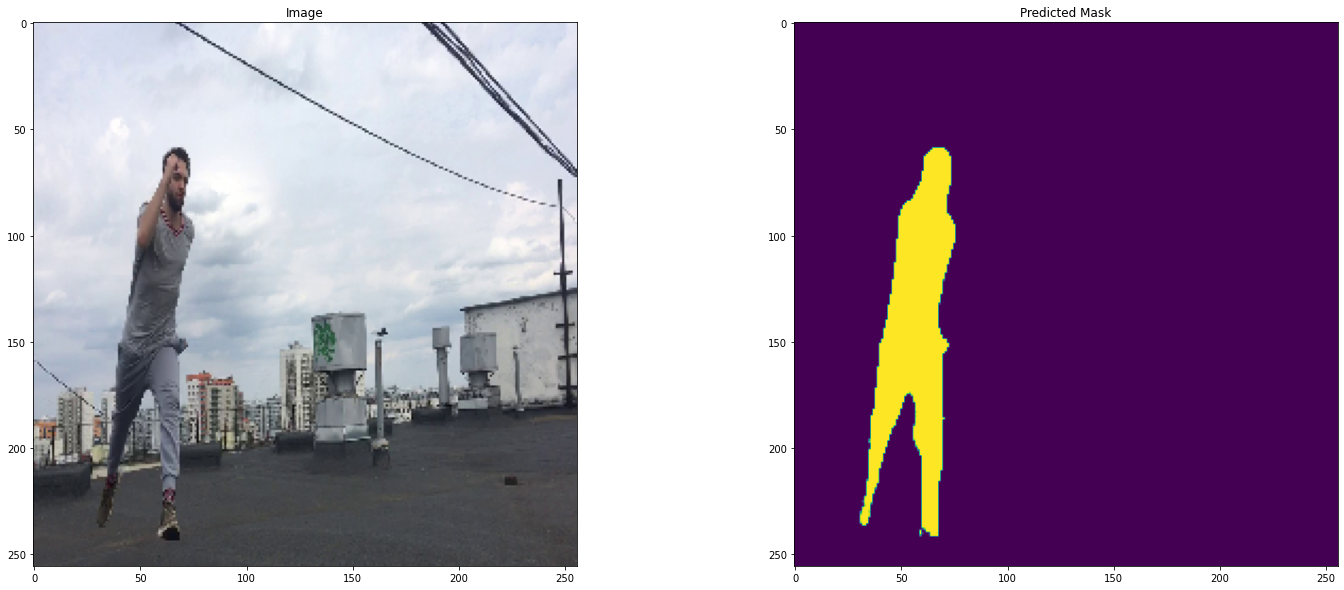

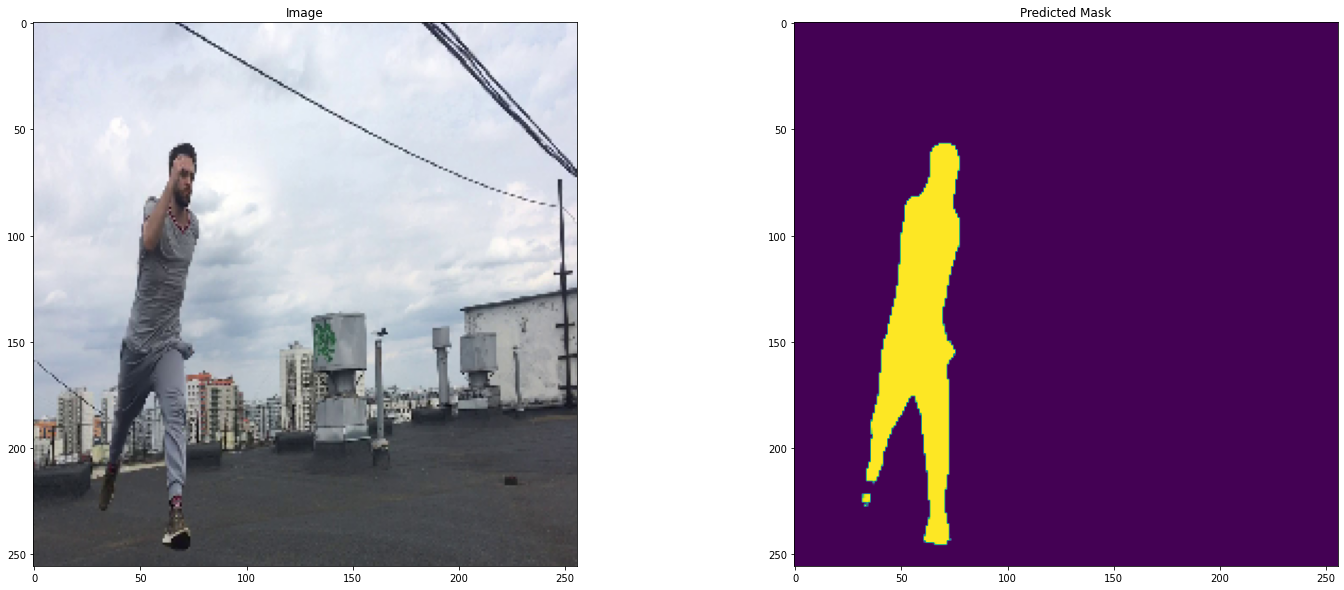

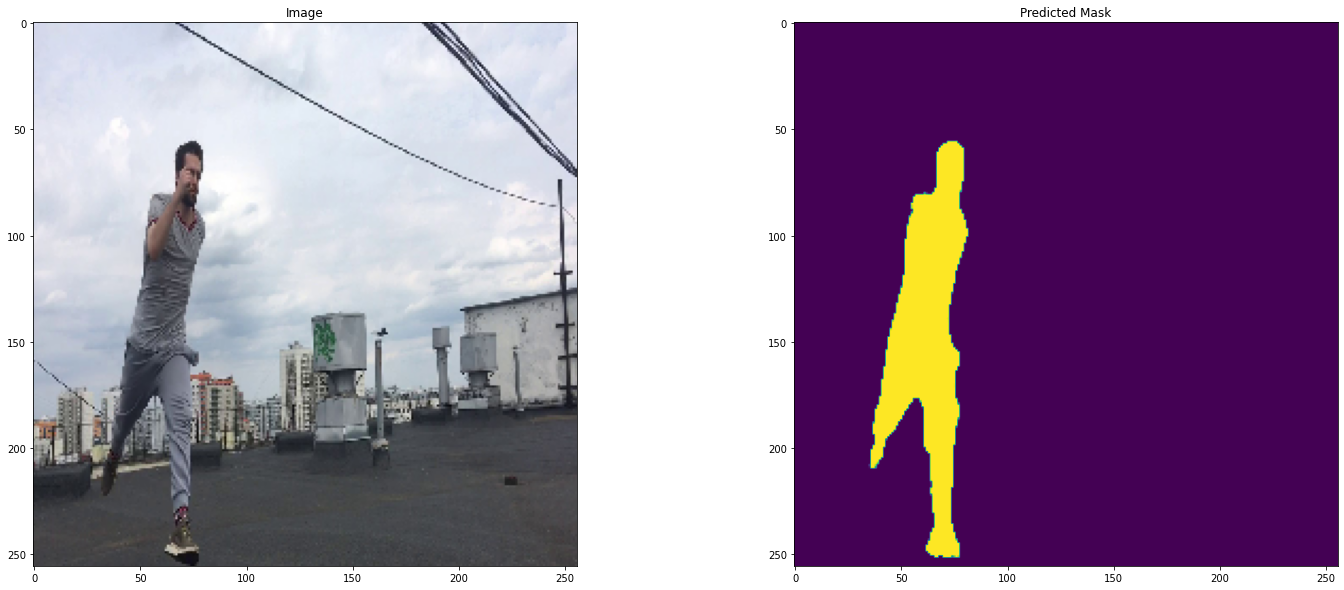

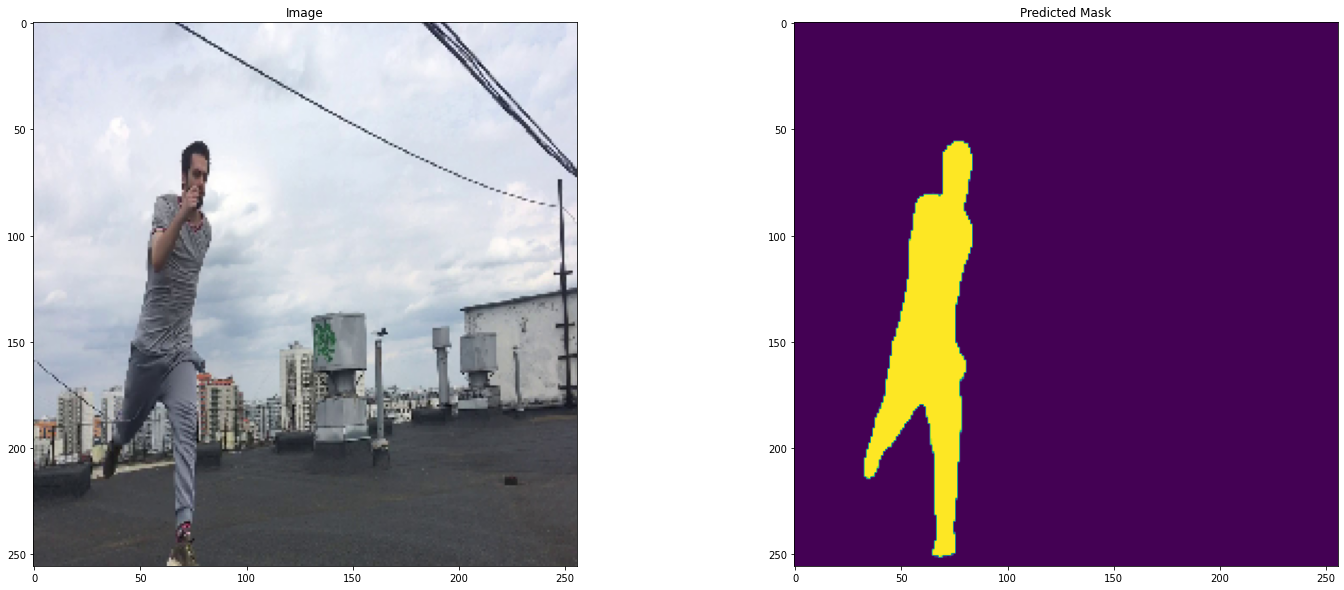

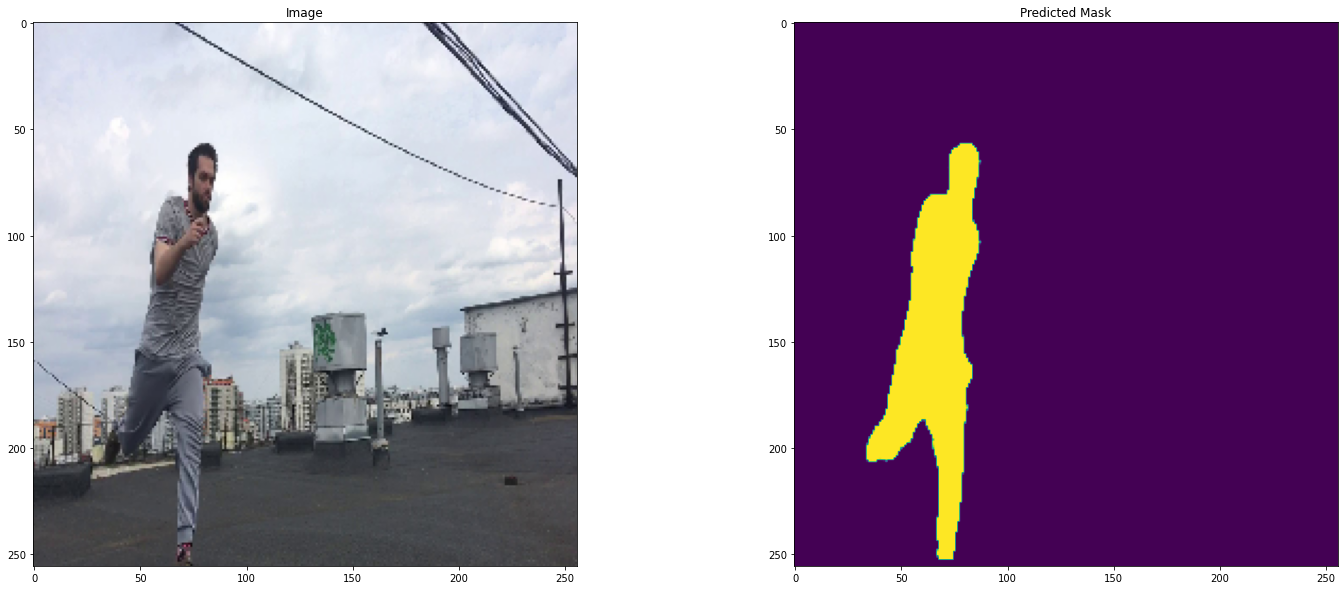

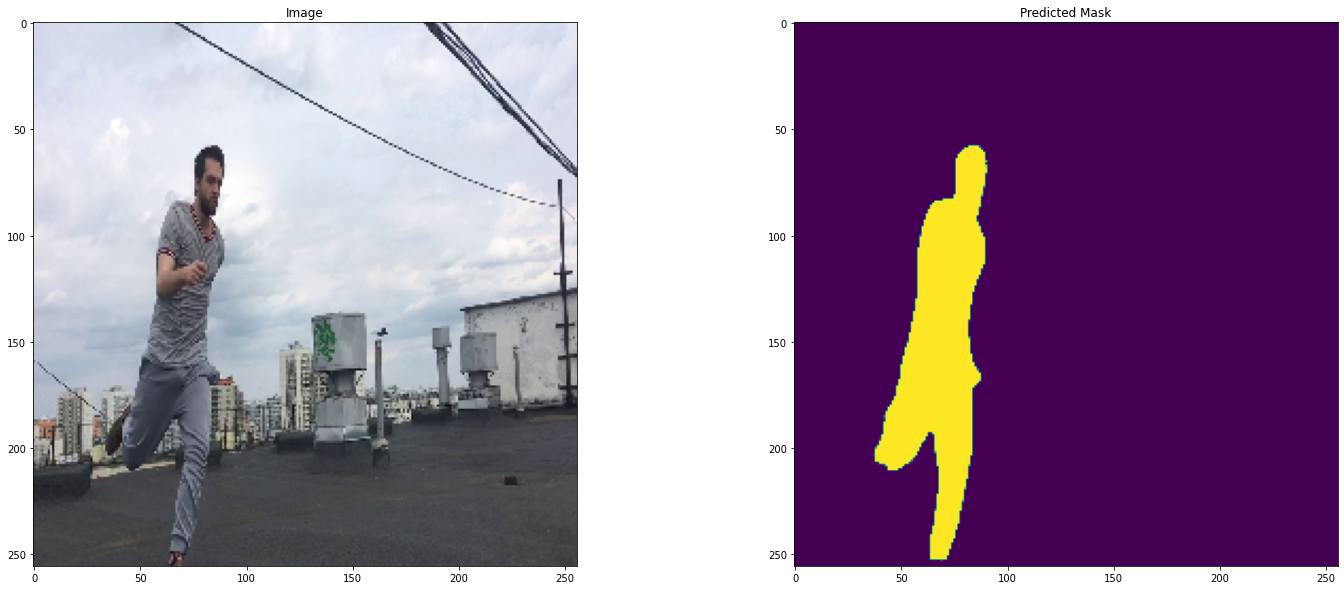

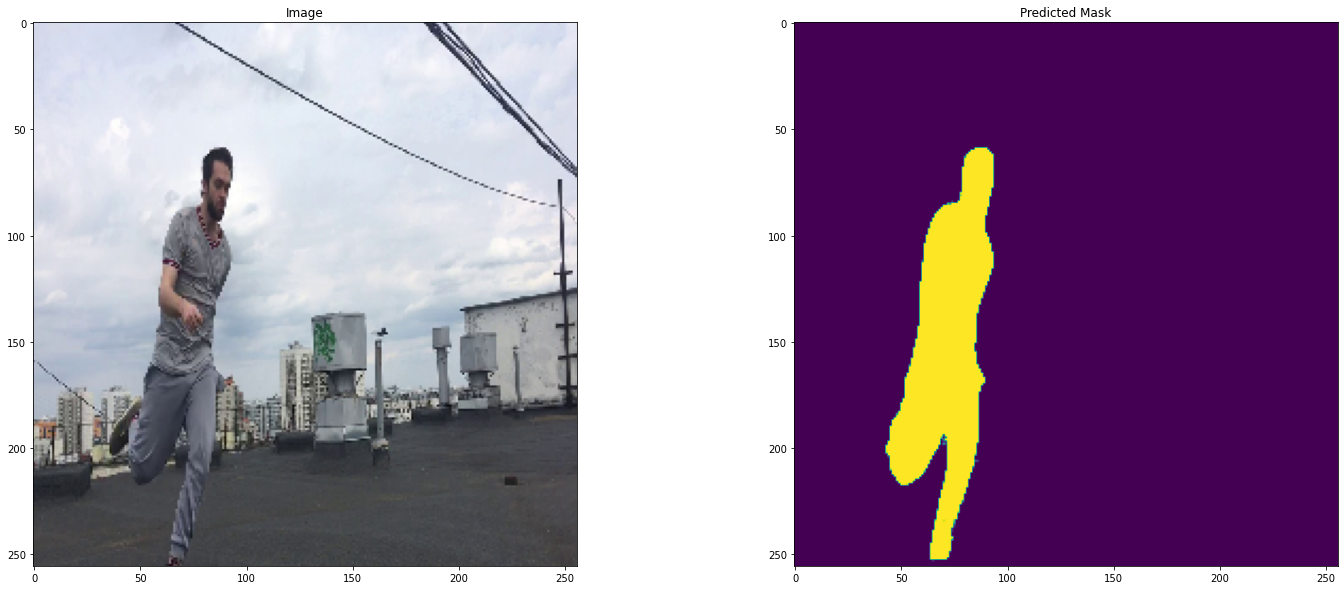

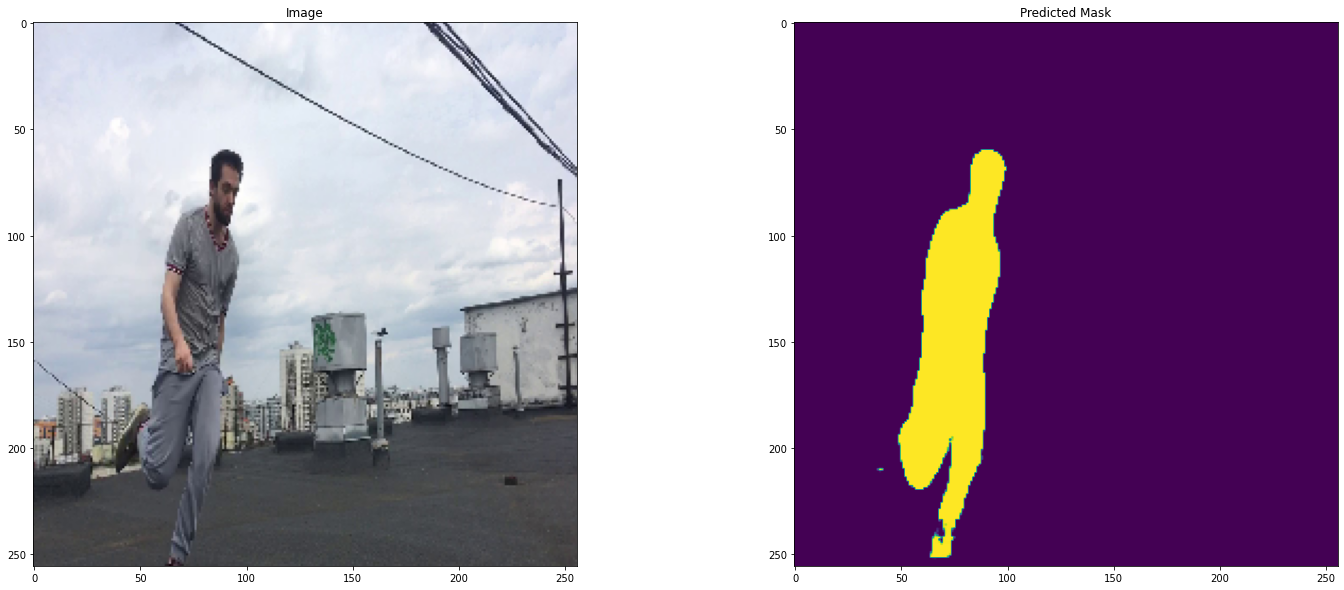

In [12]:
plotting(model,arr_img)

In [13]:
%%!
zip -r frame_masks.zip ./frame_masks


['  adding: frame_masks/ (stored 0%)',
 '  adding: frame_masks/1.jpeg (deflated 63%)',
 '  adding: frame_masks/26.jpeg (deflated 28%)',
 '  adding: frame_masks/66.jpeg (deflated 31%)',
 '  adding: frame_masks/60.jpeg (deflated 30%)',
 '  adding: frame_masks/0.jpeg (deflated 64%)',
 '  adding: frame_masks/2.jpeg (deflated 63%)',
 '  adding: frame_masks/84.jpeg (deflated 28%)',
 '  adding: frame_masks/108.jpeg (deflated 20%)',
 '  adding: frame_masks/4.jpeg (deflated 62%)',
 '  adding: frame_masks/104.jpeg (deflated 20%)',
 '  adding: frame_masks/27.jpeg (deflated 25%)',
 '  adding: frame_masks/49.jpeg (deflated 30%)',
 '  adding: frame_masks/70.jpeg (deflated 33%)',
 '  adding: frame_masks/142.jpeg (deflated 62%)',
 '  adding: frame_masks/143.jpeg (deflated 62%)',
 '  adding: frame_masks/85.jpeg (deflated 29%)',
 '  adding: frame_masks/140.jpeg (deflated 17%)',
 '  adding: frame_masks/50.jpeg (deflated 33%)',
 '  adding: frame_masks/64.jpeg (deflated 27%)',
 '  adding: frame_masks/97.jp